# Predictive Maintenance EDA Notebook

## Overview:
This notebook aims to explore and analyze the AI4I 2020 Predictive Maintenance Dataset for predictive maintenance tasks. The dataset contains information about a synthetic milling process, including various operational parameters and machine failure indicators. The primary objectives of this analysis are to understand the data's characteristics, identify patterns and relationships, and prepare the data for machine learning modeling.

## Problem Statement:
Machines are critical assets in modern industries, and ensuring their optimal performance is crucial for business operations. Traditional maintenance strategies often lead to unplanned downtime and increased costs. Predictive maintenance offers a proactive approach to address these challenges by leveraging machine learning techniques to monitor, predict, and prevent machine failures. In this project, we aim to develop machine learning models for predictive maintenance in response to Industry 4.0 initiatives. Specifically, we focus on two supervised learning tasks:

- Failure Prediction (Binary Classification): Predict whether a machine failure will occur.
- Type of Failure Detection (Multi-class Classification): Determine the type of failure based on operational parameters.
  
## Dataset Information:
- Dataset Name: AI4I 2020 Predictive Maintenance Dataset
- Source: UCI Machine Learning Repository
- DOI: https://doi.org/10.24432/C5HS5C
- Description: The dataset contains 10000 records of a synthetic milling process, with columns including operational parameters (e.g., air temperature, process temperature, rotational speed, torque, tool wear) and machine failure indicators (binary and multi-class). The goal is to utilize this dataset for building predictive maintenance models.
## Tasks:
- Explore the data distribution, summary statistics, and correlations.
- Visualize relationships between features and machine failures.
- Identify any missing values or anomalies in the dataset.
- Preprocess the data for machine learning modeling.
## Tools and Libraries:
- Python 3.x
- Jupyter Notebook
- Pandas
- NumPy
- Matplotlib
- Seaborn

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from ydata_profiling import ProfileReport

In [2]:
# read and import file
df = pd.read_csv(r"C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data\ai4i2020.csv")
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [3]:
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

## Inspecting data's basic informatiom

In [4]:
# shape and size of data
display(df.shape)
display(df.size)

(10000, 14)

140000

In [5]:
# data types of each column
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [6]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
# check for duplicates
df.duplicated().sum()

0

- There are no duplicate records in the dataset

In [8]:
# check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* There are no missing values in this dataset

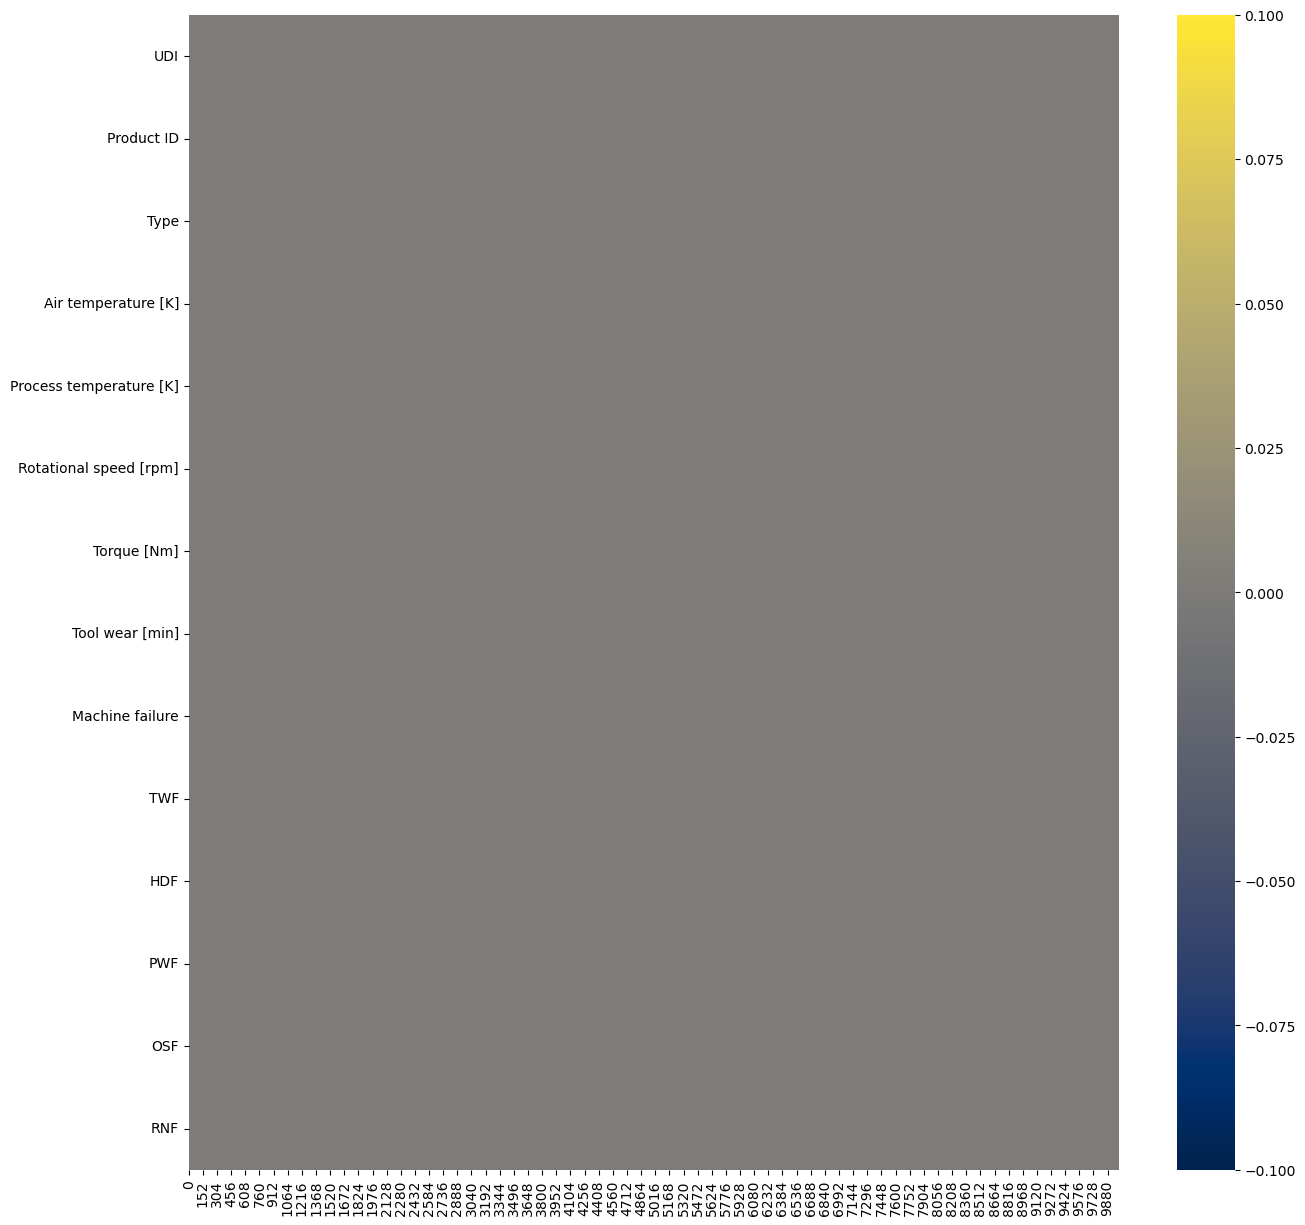

In [9]:
#plot to verify no missing values 
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

In [10]:
# summary statistics of the data
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [11]:
data = df.copy()

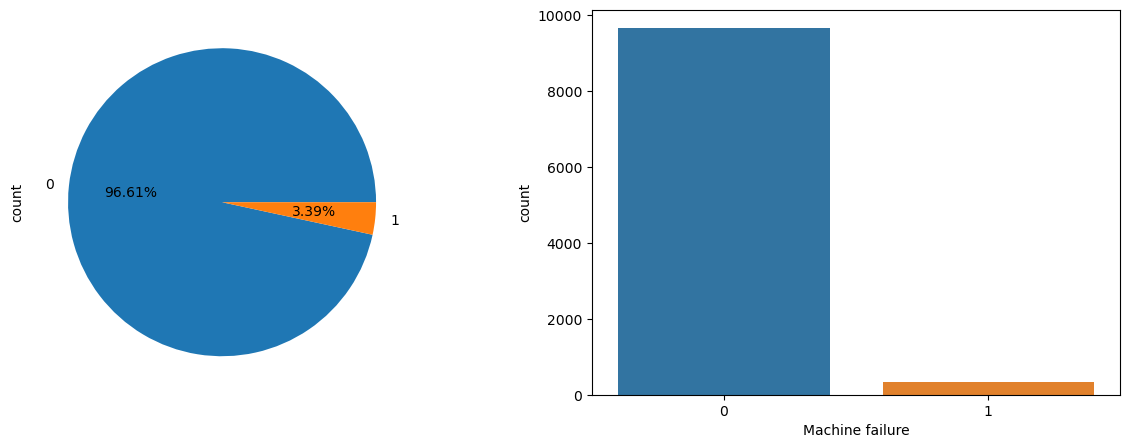

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data['Machine failure'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Machine failure', data = data)
plt.show()

In [13]:
# Determine "Failure Type" based on one-hot encoded columns
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
data['Failure Type'] = data.apply(lambda x: next((f for f in failure_types if x[f] == 1), 'No Failure'), axis=1)

# Drop the one-hot encoded columns
data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

# Now data will contain only the 'Failure Type' column and other columns except the one-hot encoded columns
data


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

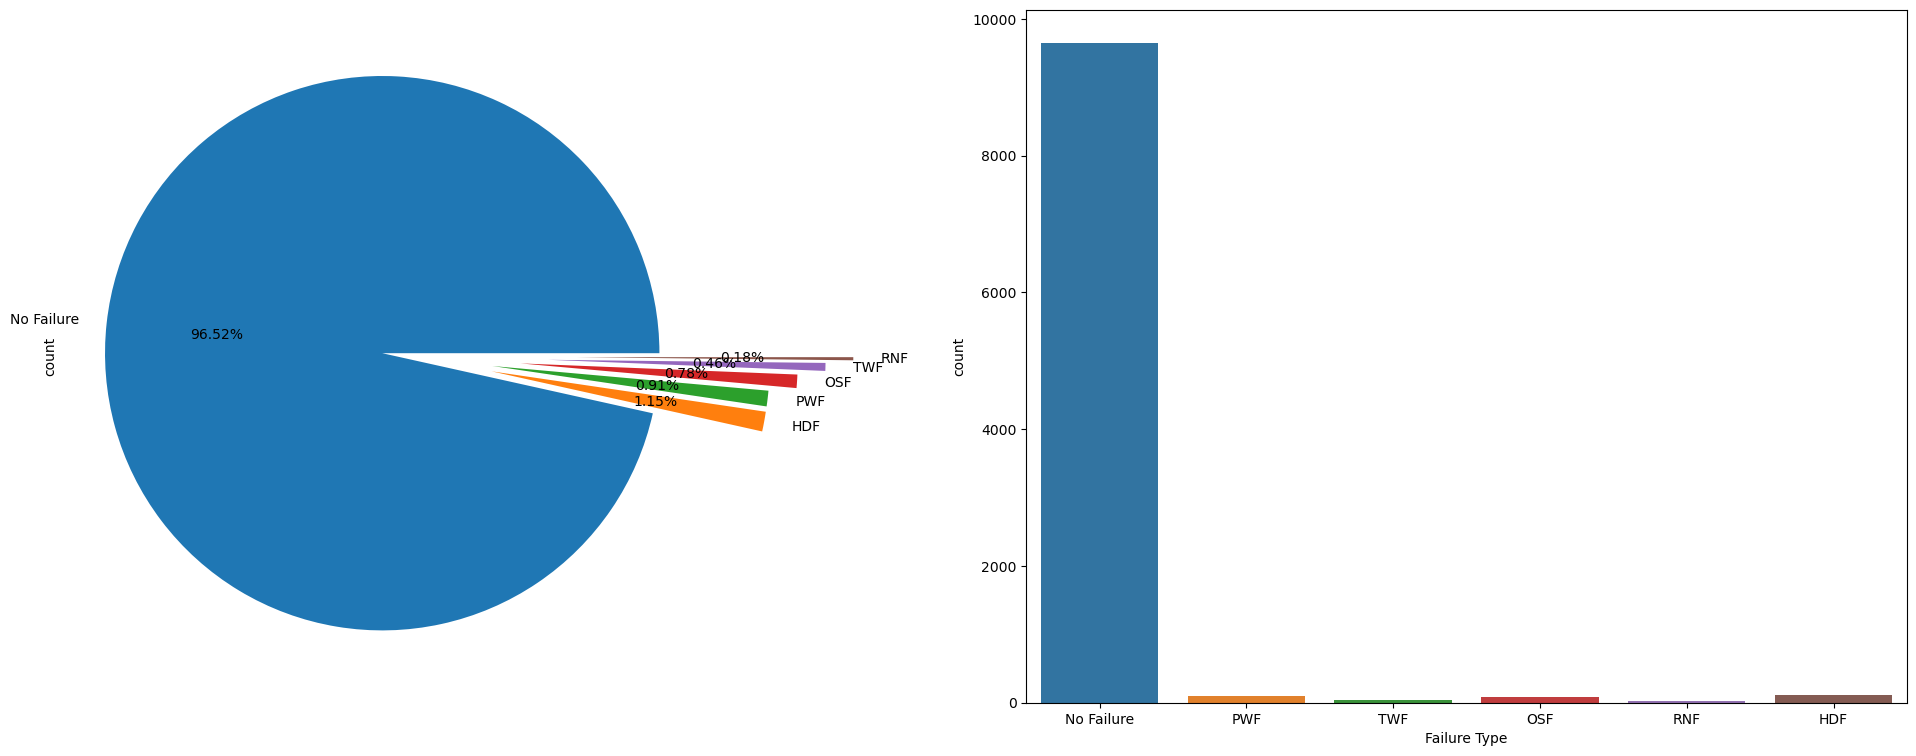

In [14]:
plt.figure(figsize = (25,9))
plt.subplot(1,2,1)
data['Failure Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0.1,0.3,0.3,0.4,0.5,0.6))
plt.subplot(1,2,2)
sns.countplot(x = 'Failure Type', data = data)
plt.show()

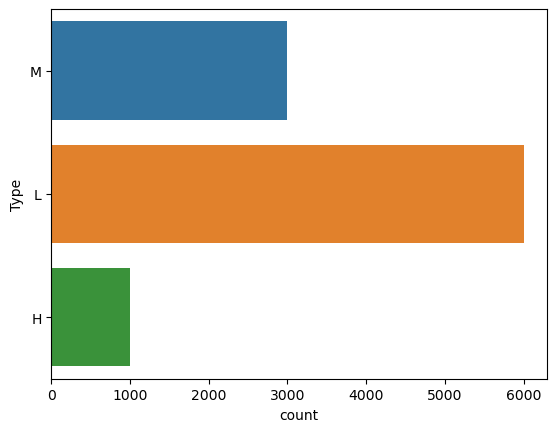

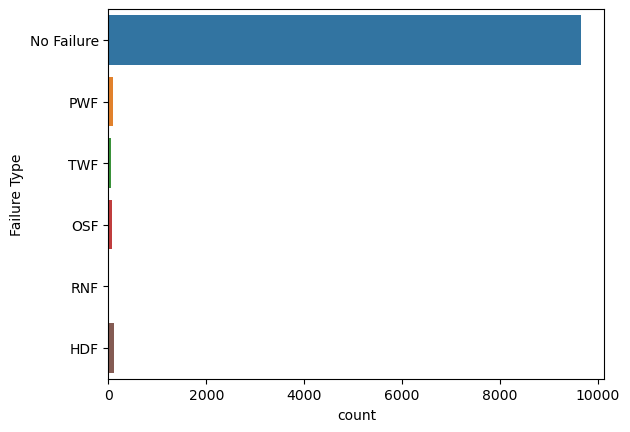

In [77]:
for feature in data.dtypes[data.dtypes == "object"].drop("Product ID").index:
    sns.countplot(y=feature, data=data)
    plt.show()

In [80]:
# Getting an overview of the feature, targets and their relationships with each other with data_profiling
Profile = ProfileReport(data, title = "Pandas Profiling Report")
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

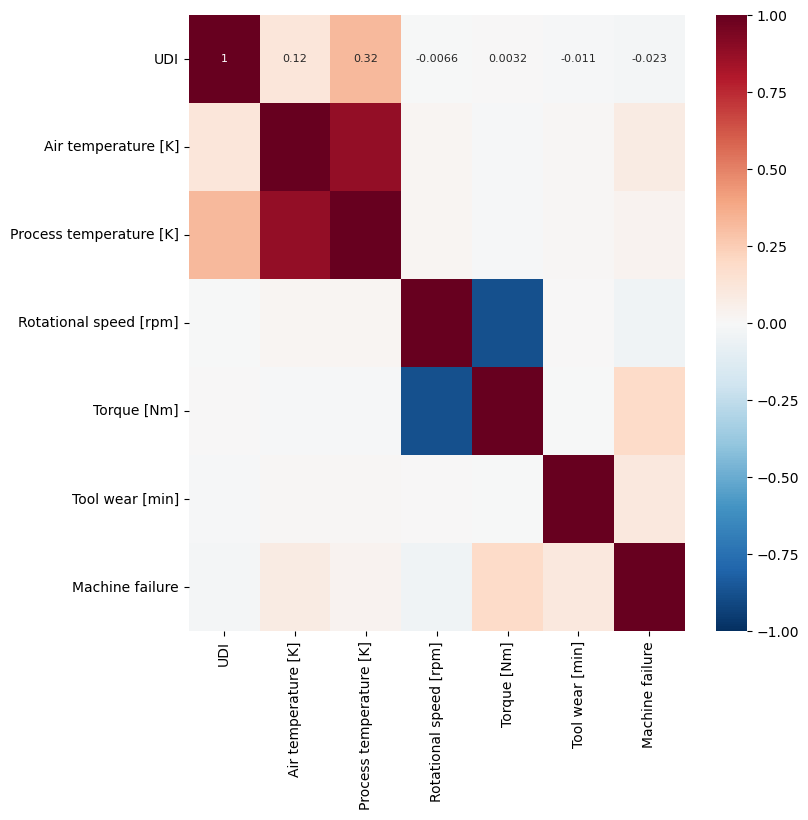

In [87]:
# Extract the numerical columns from the dataset
num_vars = data.select_dtypes(include=['int64', 'float64'])

# plot correlation with heatmap
# plot correlation with heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(num_vars.corr(), vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r', annot=True, annot_kws={"size": 8})
plt.show()

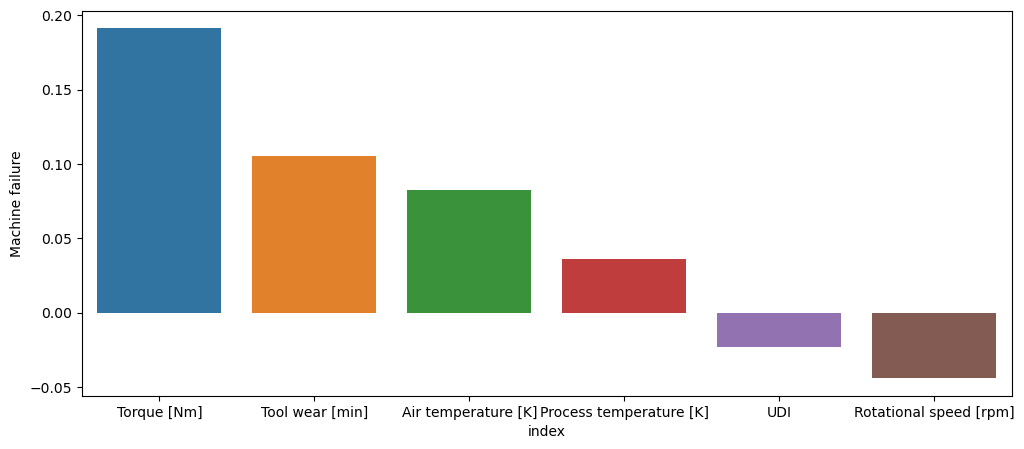

In [90]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'index', y = 'Machine failure',data = num_vars.corr()['Machine failure'].sort_values(ascending = False).reset_index()[1:])
plt.show()

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

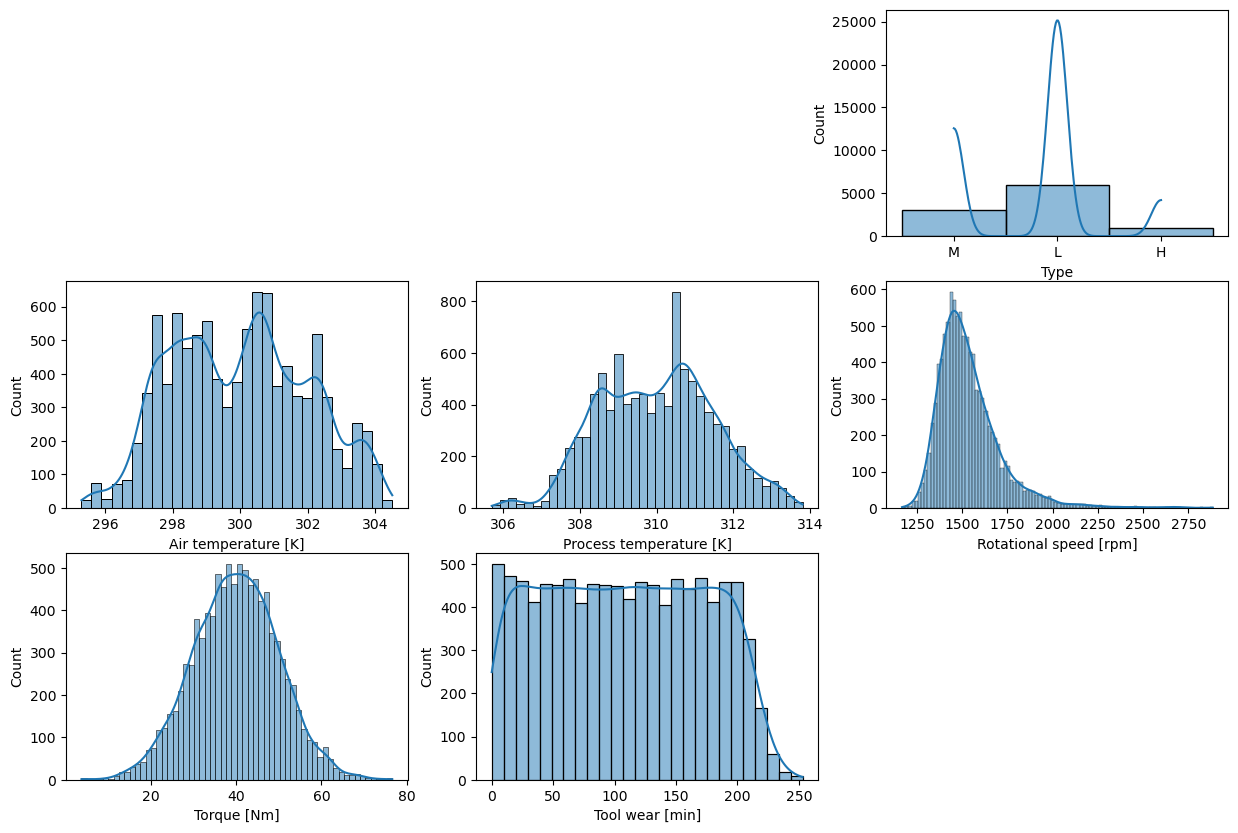

In [15]:

plt.figure(figsize=(15,10))
columns_to_exclude = ['UDI','Product ID']
num_subplots = min(9, len(data.columns) - len(columns_to_exclude))
for i, col in enumerate(data.columns, 1):
    if col not in columns_to_exclude and i <= num_subplots:
        plt.subplot(3, 3, i)
        sns.histplot(data[col], kde=True)
plt.show()

In [16]:
data["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_11008\3559492973.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Air temperature [K]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_11008\3559492973.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Air temperature [K]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-pack

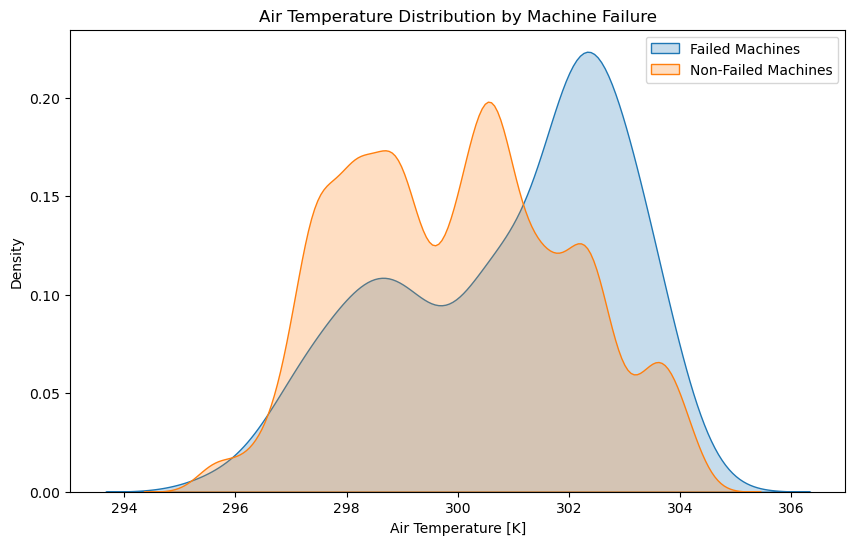

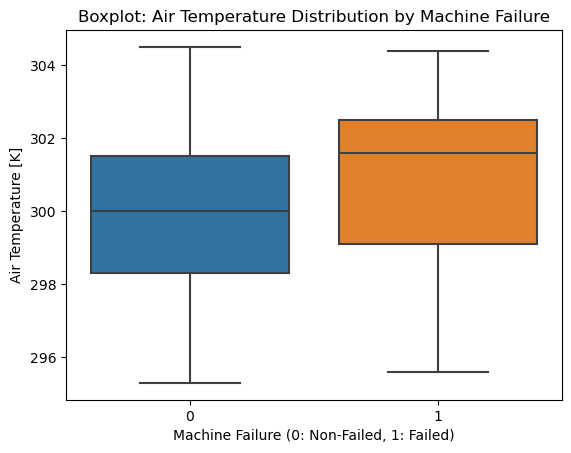

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


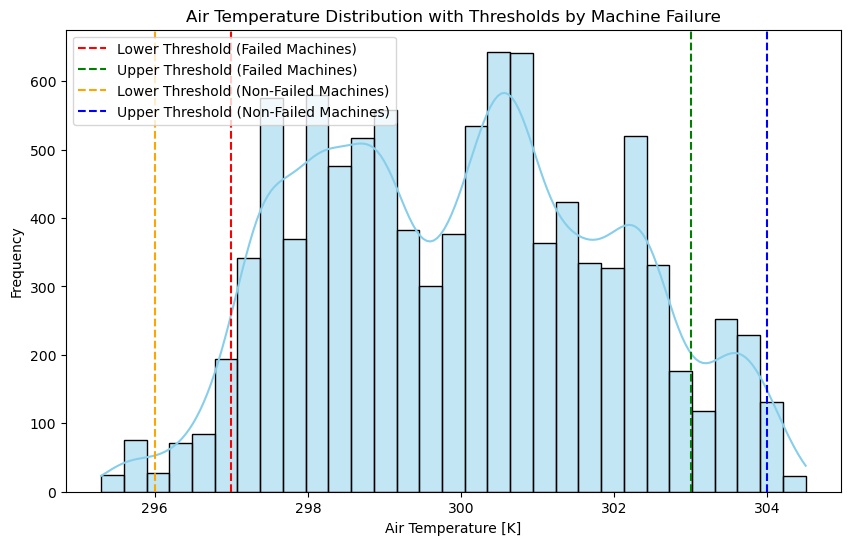

In [18]:
# Step 1: Identify Peak Patterns with Machine Failure Context
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Air temperature [K]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Air temperature [K]'], label='Non-Failed Machines', shade=True)
plt.title('Air Temperature Distribution by Machine Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=data)
plt.title('Boxplot: Air Temperature Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Air Temperature [K]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed = 297  # Example lower threshold for failed machines
threshold_max_failed = 303  # Example upper threshold for failed machines
threshold_min_non_failed = 296  # Example lower threshold for non-failed machines
threshold_max_non_failed = 304  # Example upper threshold for non-failed machines

# Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
plt.figure(figsize=(10, 6))
sns.histplot(data['Air temperature [K]'], kde=True, color='skyblue', edgecolor='black')
plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
plt.title('Air Temperature Distribution with Thresholds by Machine Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [17]:
filtered_data = data[data["Rotational speed [rpm]"] > 2000]
grouped_counts = filtered_data.groupby("Machine failure").size()
grouped_counts

Machine failure
0    193
1     33
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_11008\1593865558.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Process temperature [K]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_11008\1593865558.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Process temperature [K]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\s

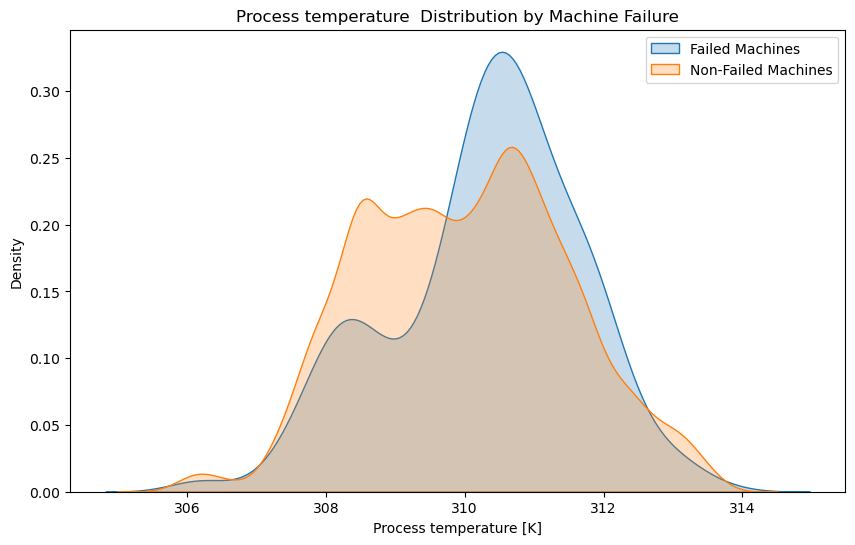

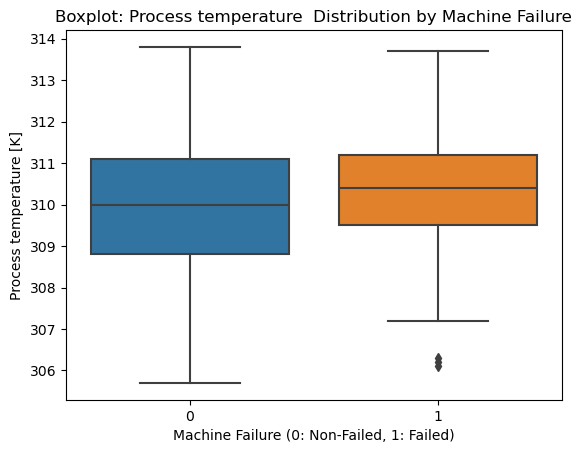

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


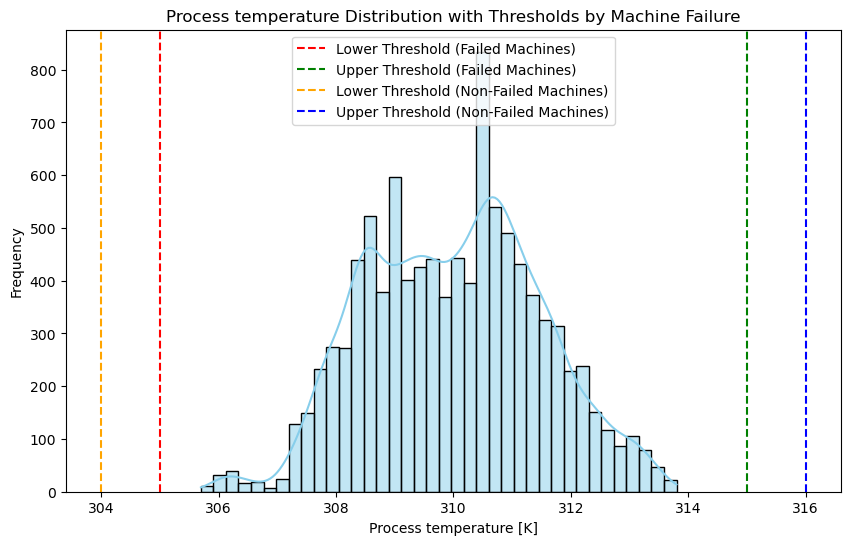

In [19]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Process temperature [K]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Process temperature [K]'], label='Non-Failed Machines', shade=True)
plt.title('Process temperature  Distribution by Machine Failure')
plt.xlabel('Process temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Process temperature [K]', data=data)
plt.title('Boxplot: Process temperature  Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Process temperature [K]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed =  305   # Example lower threshold for failed machines
threshold_max_failed = 315  # Example upper threshold for failed machines
threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
plt.figure(figsize=(10, 6))
sns.histplot(data['Process temperature [K]'], kde=True, color='skyblue', edgecolor='black')
plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
plt.title('Process temperature Distribution with Thresholds by Machine Failure')
plt.xlabel('Process temperature [K]')
plt.ylabel('Frequency')
plt.legend()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11008\1177904852.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Rotational speed [rpm]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_11008\1177904852.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Rotational speed [rpm]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\sit

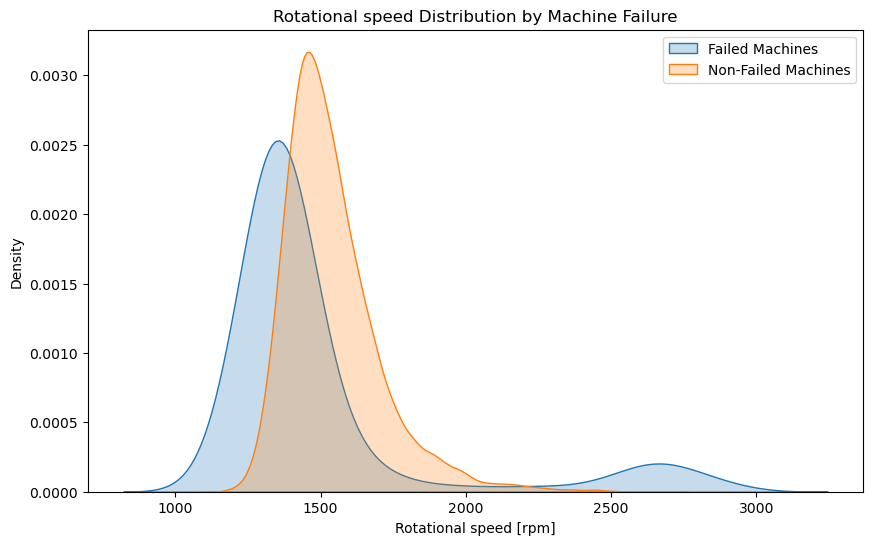

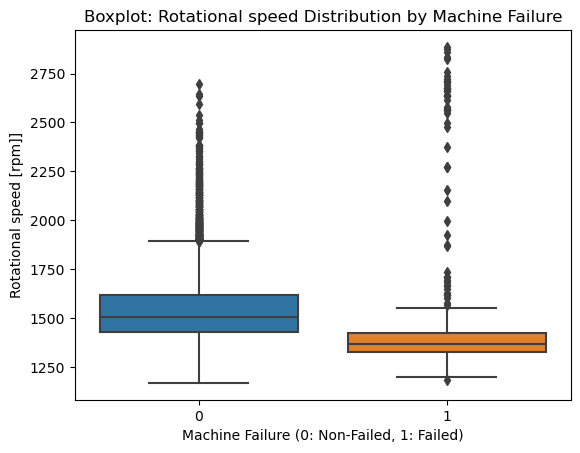

In [20]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Rotational speed [rpm]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Rotational speed [rpm]'], label='Non-Failed Machines', shade=True)
plt.title('Rotational speed Distribution by Machine Failure')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=data)
plt.title('Boxplot: Rotational speed Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Rotational speed [rpm]]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed =  305   # Example lower threshold for failed machines
threshold_max_failed = 315  # Example upper threshold for failed machines
threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# # Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rotational speed [rpm]'], kde=True, color='skyblue', edgecolor='black')
# plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
# plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
# plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
# plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
# plt.title('Rotational speed Distribution with Thresholds by Machine Failure')
# plt.xlabel('Rotational speed [rpm]')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11008\1519294957.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Torque [Nm]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_11008\1519294957.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Torque [Nm]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_ol

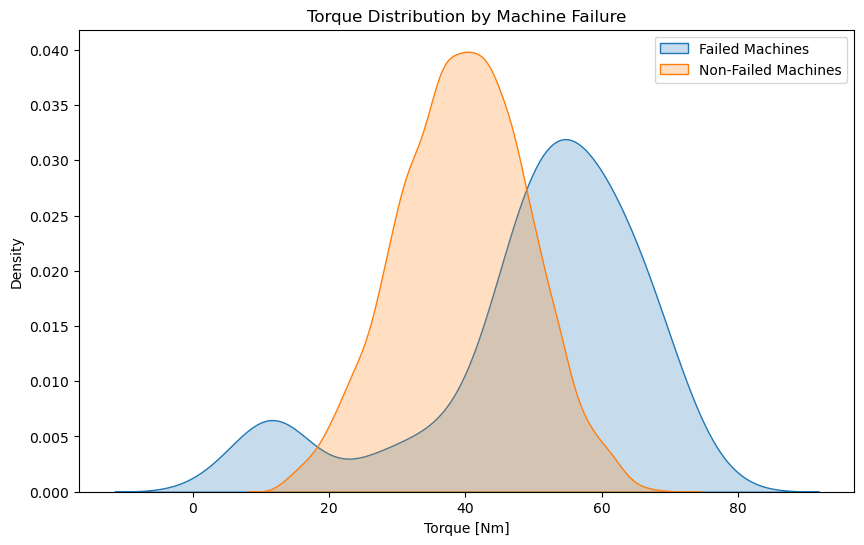

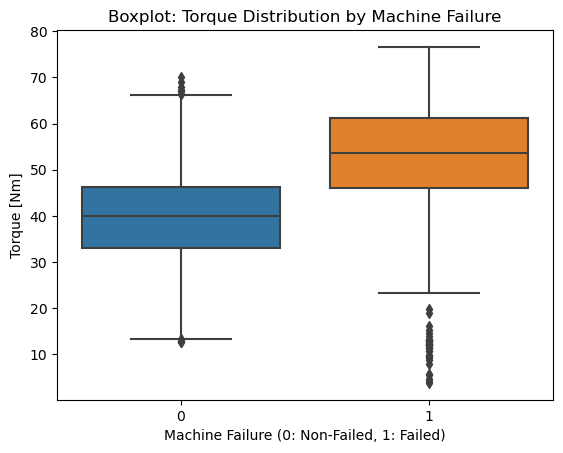

In [22]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Torque [Nm]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Torque [Nm]'], label='Non-Failed Machines', shade=True)
plt.title('Torque Distribution by Machine Failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=data)
plt.title('Boxplot: Torque Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Torque [Nm]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed =  305   # Example lower threshold for failed machines
threshold_max_failed = 315  # Example upper threshold for failed machines
threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# # Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rotational speed [rpm]'], kde=True, color='skyblue', edgecolor='black')
# plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
# plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
# plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
# plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
# plt.title('Rotational speed Distribution with Thresholds by Machine Failure')
# plt.xlabel('Rotational speed [rpm]')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11008\383393232.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Tool wear [min]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_11008\383393232.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Tool wear [min]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seabo

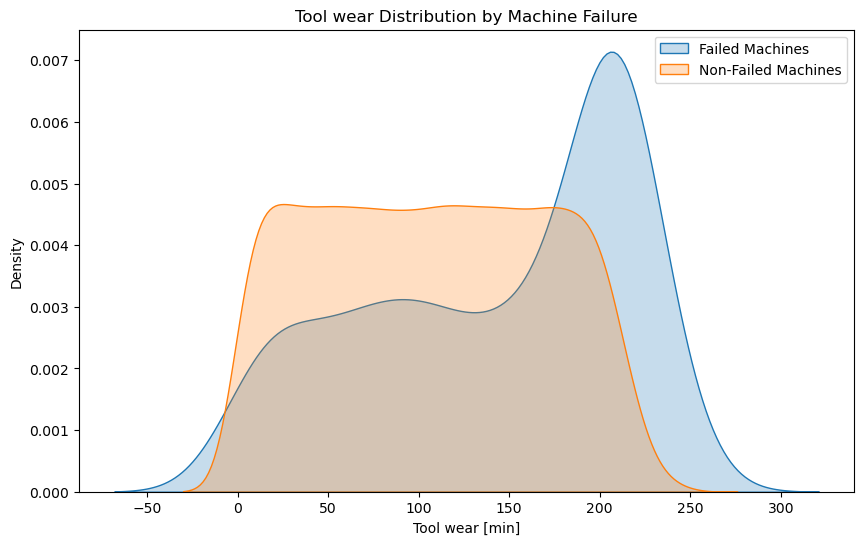

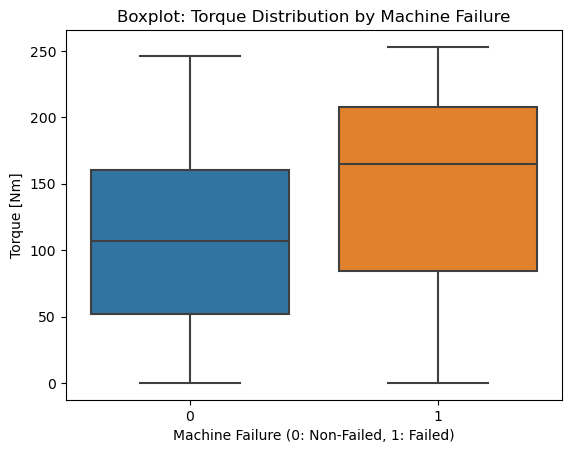

In [23]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Tool wear [min]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Tool wear [min]'], label='Non-Failed Machines', shade=True)
plt.title('Tool wear Distribution by Machine Failure')
plt.xlabel('Tool wear [min]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=data)
plt.title('Boxplot: Torque Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Torque [Nm]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
# threshold_min_failed =  305   # Example lower threshold for failed machines
# threshold_max_failed = 315  # Example upper threshold for failed machines
# threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
# threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# # Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rotational speed [rpm]'], kde=True, color='skyblue', edgecolor='black')
# plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
# plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
# plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
# plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
# plt.title('Rotational speed Distribution with Thresholds by Machine Failure')
# plt.xlabel('Rotational speed [rpm]')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


In [28]:
# Investigate how  types (low,medium and high quality) impact machine failure.

df.groupby('Machine failure')['Type'].value_counts()

Machine failure  Type
0                L       5765
                 M       2914
                 H        982
1                L        235
                 M         83
                 H         21
Name: count, dtype: int64

In [42]:
# Understand how Air temperature and the relationship with the Type affect machine_failure.

# Group by 'household_size' and 'relationship_with_head' and count occurrences of bank accounts
count_machine_failure = df.groupby(['Air temperature [K]', 'Type'])['Machine failure'].value_counts()

# Print the result
# count_machine_failure

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


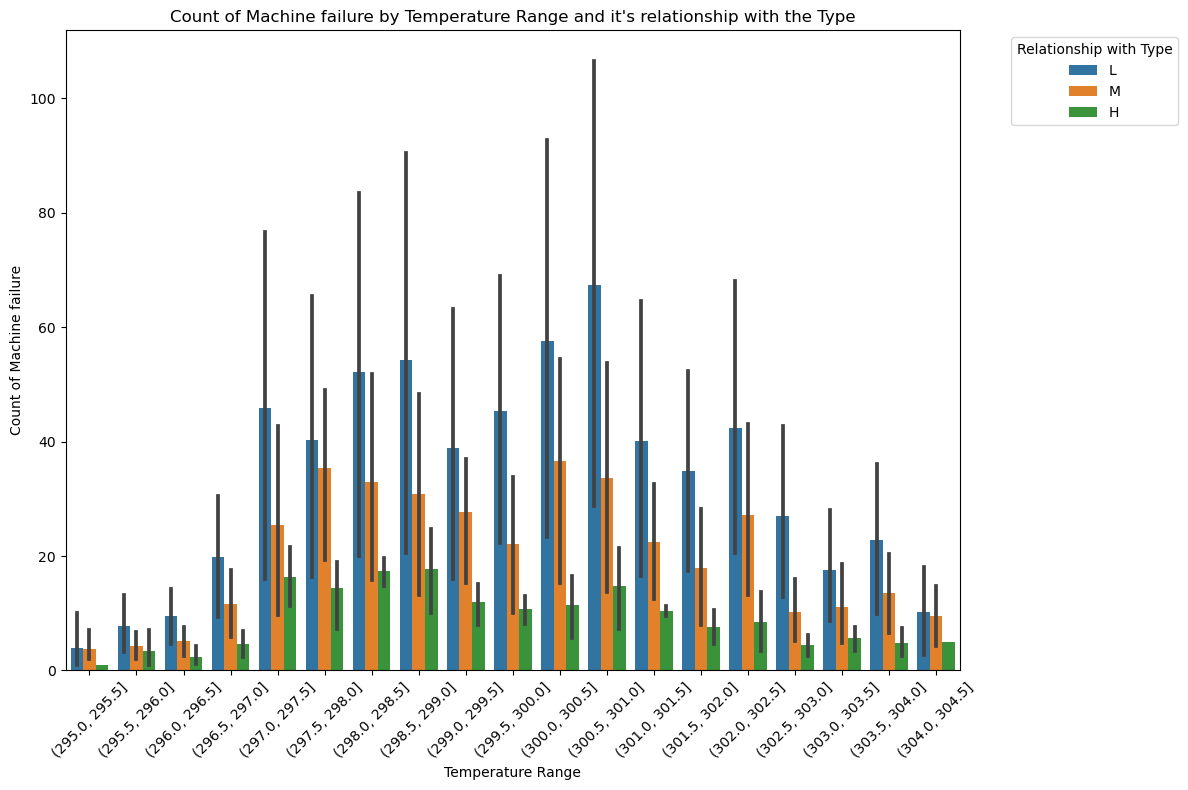

In [46]:
# Define temperature ranges
temperature_ranges = [295 + i*0.5 for i in range(20)]  # Define the ranges as per your preference

# Discretize 'Air temperature [K]' into temperature bins
count_Machine_failure['Temperature Range'] = pd.cut(count_Machine_failure['Air temperature [K]'], bins=temperature_ranges)

# Plot the count of individuals with bank accounts for each temperature range and relationship with type
plt.figure(figsize=(12, 8))
sns.barplot(data=count_Machine_failure, x='Temperature Range', y='count', hue='Type')
plt.xlabel('Temperature Range')
plt.ylabel('Count of Machine failure')
plt.title("Count of Machine failure by Temperature Range and it's relationship with the Type")
plt.xticks(rotation=45)
plt.legend(title='Relationship with Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


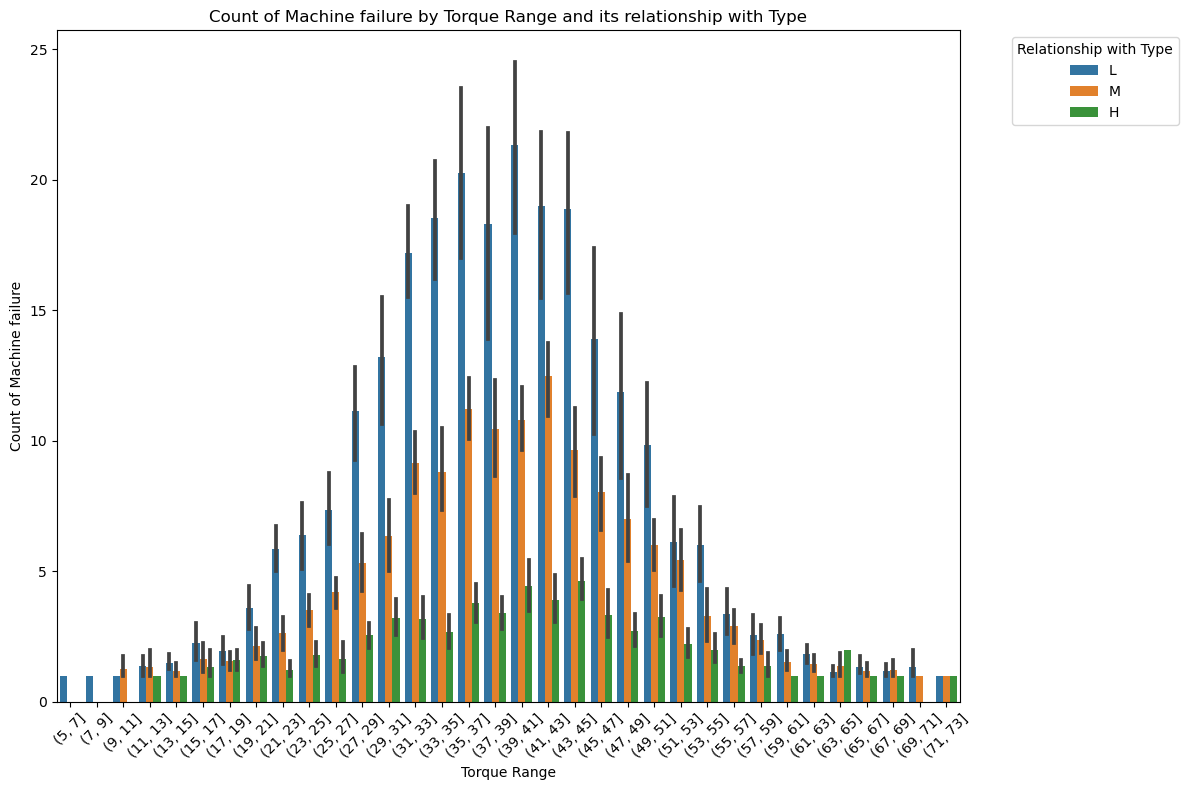

In [53]:
# Group by 'Torque [Nm]' and 'Type' and count occurrences of 'Machine failure'
count_machine_failure = df.groupby(['Torque [Nm]', 'Type'])['Machine failure'].value_counts().reset_index(name='count')

# Define torque ranges
torque_ranges = [5 + i*2 for i in range(35)]  # Define the ranges as per your preference

# Discretize 'Torque [Nm]' into torque bins
count_machine_failure['Torque Range'] = pd.cut(count_machine_failure['Torque [Nm]'], bins=torque_ranges)

# Plot the count of machine failures for each torque range and relationship with type
plt.figure(figsize=(12, 8))
sns.barplot(data=count_machine_failure, x='Torque Range', y='count', hue='Type')
plt.xlabel('Torque Range')
plt.ylabel('Count of Machine failure')
plt.title("Count of Machine failure by Torque Range and its relationship with Type")
plt.xticks(rotation=45)
plt.legend(title='Relationship with Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [69]:
data["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

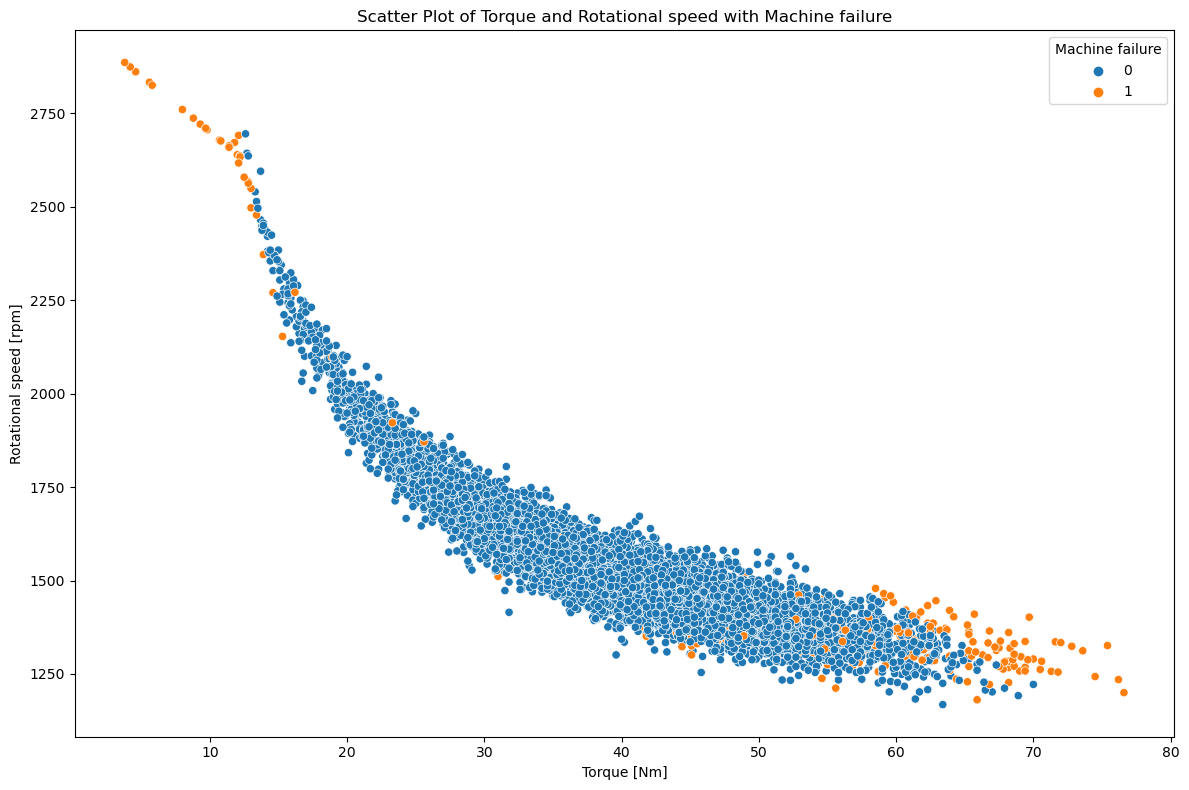

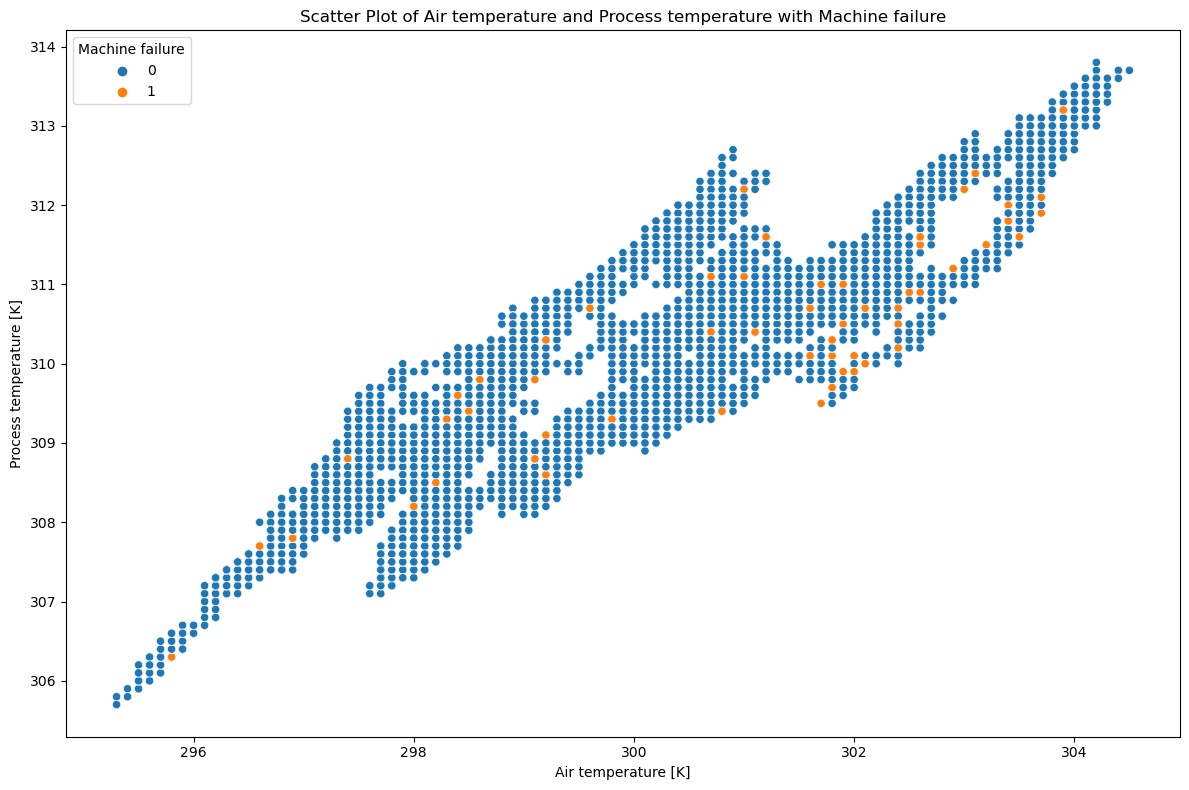

In [74]:

# Scatter plot for Torque and Rotational speed with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Torque [Nm]', y='Rotational speed [rpm]', hue='Machine failure')
plt.title('Scatter Plot of Torque and Rotational speed with Machine failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()

# Scatter plot for Air temperature and Process temperature with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Air temperature [K]', y='Process temperature [K]', hue='Machine failure')
plt.title('Scatter Plot of Air temperature and Process temperature with Machine failure')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()


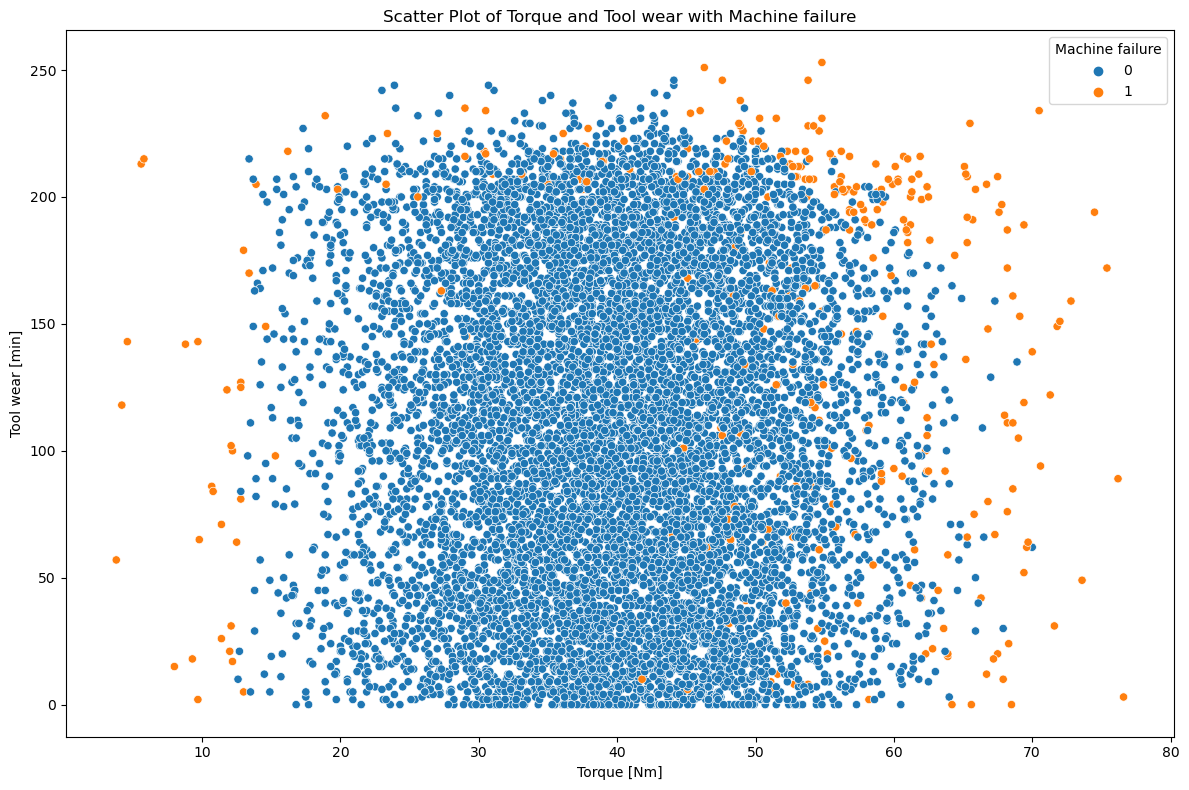

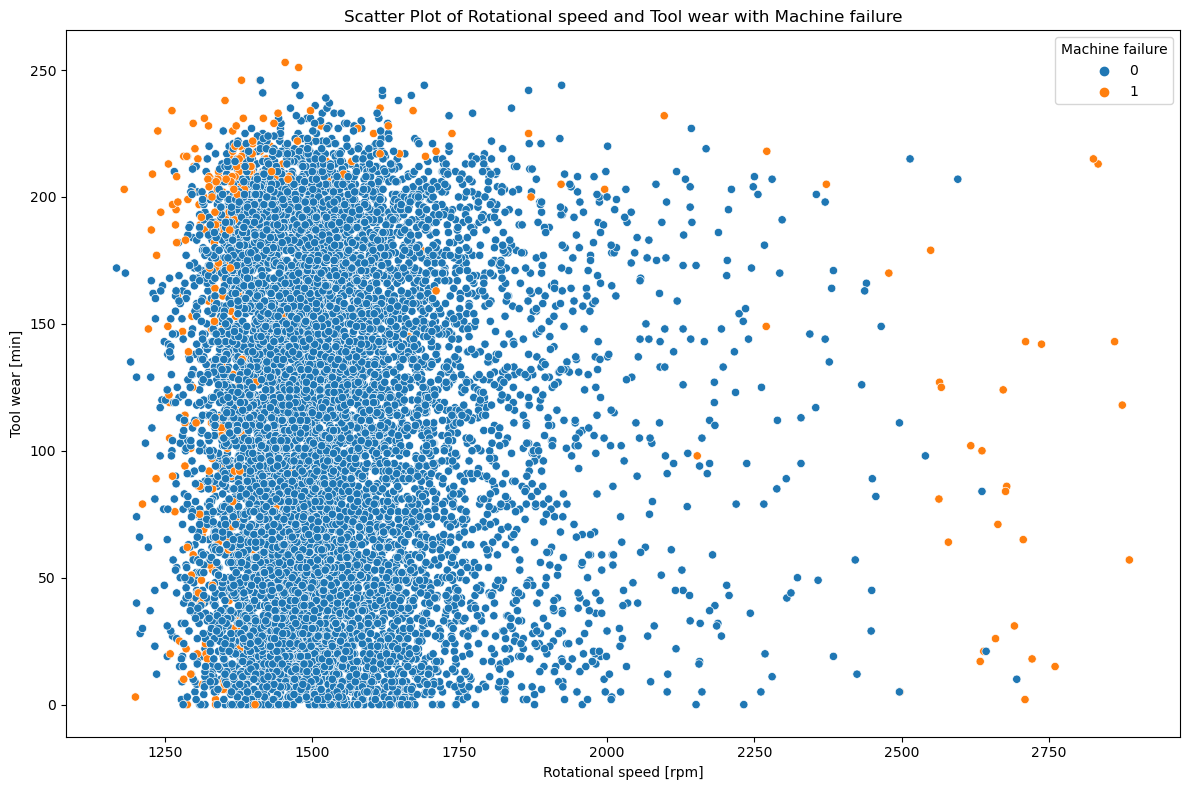

In [75]:
# Scatter plot for Torque and Tool wear with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Torque [Nm]', y='Tool wear [min]', hue='Machine failure')
plt.title('Scatter Plot of Torque and Tool wear with Machine failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()

# Scatter plot for Rotational speed and Tool wear with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Tool wear [min]', hue='Machine failure')
plt.title('Scatter Plot of Rotational speed and Tool wear with Machine failure')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()


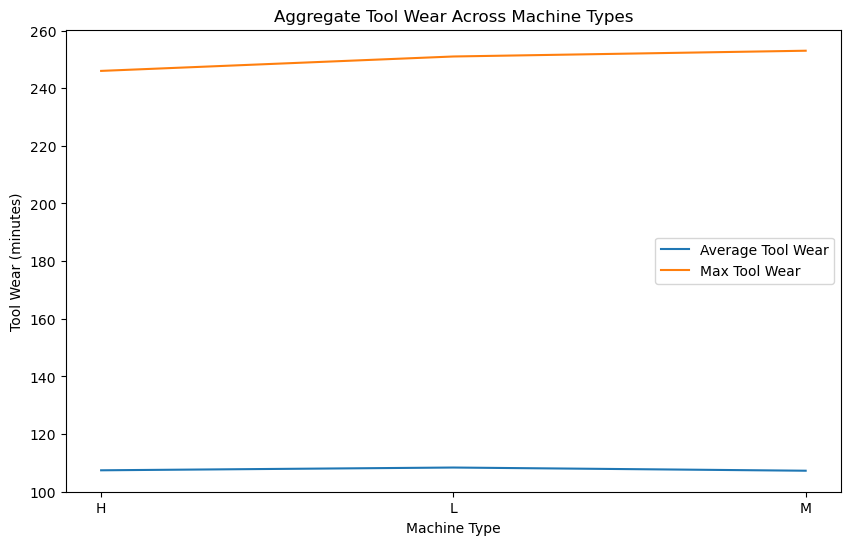

In [24]:
# Step 1: Define Time Intervals


summary_statistics = data.groupby('Type').agg({
    'Tool wear [min]': ['mean', 'sum', 'max']
}).reset_index()


# Step 2: Visualize Aggregate Metrics
plt.figure(figsize=(10, 6))
plt.plot(summary_statistics['Type'], summary_statistics[('Tool wear [min]', 'mean')], label='Average Tool Wear')
plt.plot(summary_statistics['Type'], summary_statistics[('Tool wear [min]', 'max')], label='Max Tool Wear')
plt.xlabel('Machine Type')
plt.ylabel('Tool Wear (minutes)')
plt.title('Aggregate Tool Wear Across Machine Types')
plt.legend()
plt.show()

Machine type M tends to experience higher maximum tool wear compared to types L and H.
However, the average tool wear remains relatively consistent across all machine types.
These insights can inform maintenance strategies, indicating that while machine type M may require more frequent attention due to higher maximum wear, regular maintenance practices can help maintain consistent performance across all machine types.

In [25]:
# Select only numerical columns for skewness calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical feature
skewness = pd.DataFrame({'Skewness': numerical_columns.apply(lambda x: x.skew())})

# Display skewness values
print(skewness)

                          Skewness
UDI                       0.000000
Air temperature [K]       0.114274
Process temperature [K]   0.015027
Rotational speed [rpm]    1.993171
Torque [Nm]              -0.009517
Tool wear [min]           0.027292
Machine failure           5.151852
TWF                      14.644462
HDF                       9.164789
PWF                      10.114516
OSF                       9.953916
RNF                      22.879570


## checking for outliers